In [24]:
import pandas as pd

df = pd.read_csv('data/Fish.csv')

In [25]:
cond = df['Species'].isin(['Bream', 'Smelt']) # isin(): 2개 이상의 데이터의 유무를 판단할 때 사용
lw_df = df.loc[cond, ['Length2', 'Weight']]
lw_df.values # 2차원 numpy의 list 형태
fish_data = lw_df.values.tolist() # 를 리스트로 바꾸기

In [26]:
fish_target = [1] * 35 + [0] * 14

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
kn = KNeighborsClassifier()

In [34]:
train_input = fish_data[:35]
train_target = fish_target[:35]

test_input = fish_data[35:]
test_target = fish_target[35:]

In [35]:
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [36]:
kn.score(test_input, test_target) # 샘플링 편향

0.0

In [37]:
import numpy as np

In [38]:
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [42]:
np.random.seed(42) # seed를 부여하면 똑같은 랜덤값을 볼 수 있음
index = np.arange(49)
np.random.shuffle(index)
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [43]:
input_arr[[1, 3]]

array([[ 26.3, 290. ],
       [ 29. , 363. ]])

In [50]:
train_input = input_arr[index[:35]] # 데이터를 섞어서 일부분을 사용
train_target = target_arr[index[:35]]

In [51]:
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

In [52]:
import matplotlib.pyplot as plt

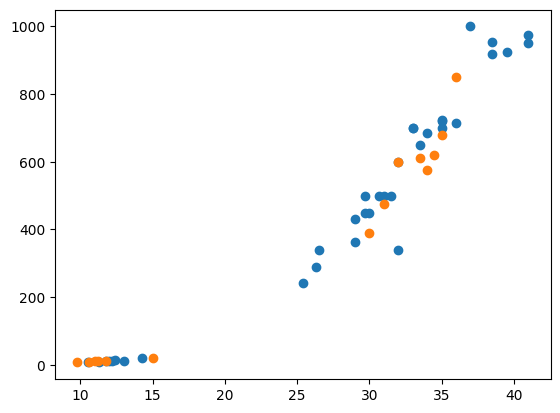

In [53]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1]) # 데이터들이 균일하게 바뀌었는지 확인

In [54]:
kn.fit(train_input, train_target) # 35개 학습

KNeighborsClassifier()

In [56]:
kn.score(test_input, test_target) # 14개 정답

1.0

In [57]:
kn.predict(test_input) # 정답지와 똑같다

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

## iris

In [61]:
import seaborn as sns
iris = sns.load_dataset('iris')

# setosa, versicolor
# petal_length, petal_width

In [134]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [137]:
cond = iris['species'].isin(['setosa', 'versicolor'])
lw_iris = iris.loc[cond, ['petal_length', 'petal_width']]
iris_data = lw_iris.values.tolist()

In [152]:
iris_target = [1] * len(iris.loc[iris['species'] == 'setosa']) + [0] * len(iris.loc[iris['species'] == 'versicolor'])

In [190]:
input_iris = np.array(iris_data)
target_iris = np.array(iris_target)

In [161]:
index = np.arange(len(input_iris))
np.random.shuffle(index)

In [187]:
train_input = input_iris[index[:70]]
train_target = target_iris[index[:70]]

test_input = input_iris[index[70:]]
test_target = target_iris[index[70:]]

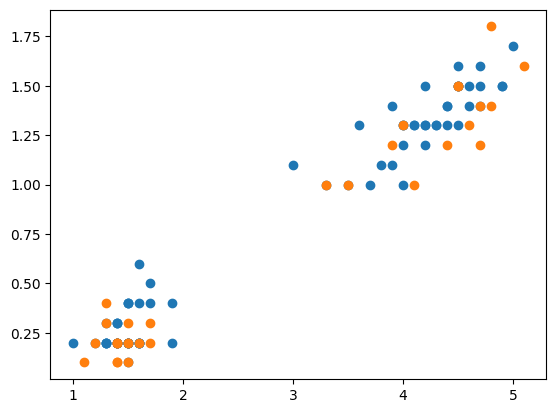

In [183]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])

In [184]:
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [185]:
kn.score(test_input, test_target)

1.0

In [144]:
# 선생님 코드
cond = iris['species'].isin(['setosa', 'versicolor'])
iris_df = iris.loc[cond, ['petal_length', 'petal_width']]

iris_data = iris_df.values

In [149]:
setosa_count = iris.loc[iris['species'] == 'setosa'].shape[0]
versicolor_count = iris.loc[iris['species'] == 'versicolor'].shape[0]

In [166]:
import numpy as np

iris_target = np.array([1] * setosa_count + [0] * versicolor_count) # fancy indexing 필요

In [167]:
import random

index = list(range(setosa_count + versicolor_count))
random.shuffle(index)

In [168]:
train_input = iris_data[index[:70]]
train_target = iris_target[index[:70]]

In [172]:
test_input = iris_data[index[70:]]
test_target = iris_target[index[70:]]

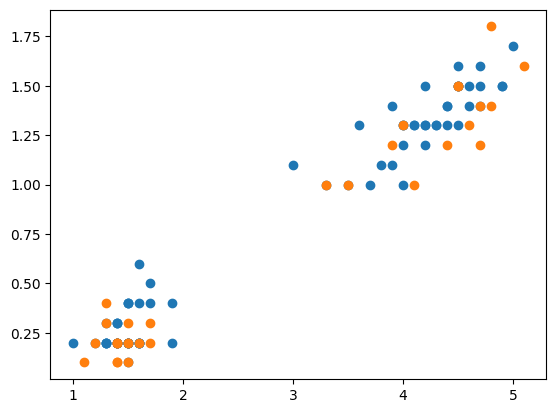

In [173]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])

In [174]:
from sklearn.neighbors import KNeighborsClassifier

In [176]:
kn = KNeighborsClassifier()

In [178]:
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [179]:
kn.score(test_input, test_target)

1.0